# Estimate of time of closest approach of Beta Pic c
M Kenworthy // Leiden Observatory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kepler3 import *

a_c = 2.68 * u.au
P_c = 3.0 * u.yr

Mstar = 1.78 * u.M_sun
Rstar = 1.497 * u.Rsun # Zwintz19
Mc = 7.8 * u.M_jup

%precision 4

rhill_c = rhill(Mstar, Mc, a_c)

2006.7214236824093
Tp in years is 2006.6114236824094 yr
3.3614865714711897 AU


Text(0.5, 1.0, 'Orbit of Beta Pic c seen from above')

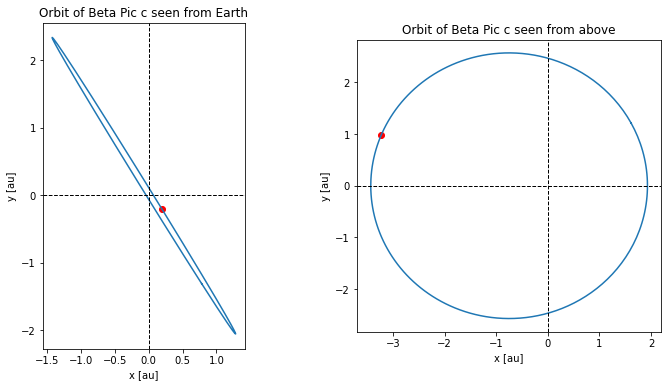

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

    # NOTE: numbers in Table C.4 don't agree with numbers in Triangle plot in Fig 5.
    # I am taking the numbers from the Triangle plot
    #
P = 3.30 * u.yr # Lagrange2020 from Fig 5
Tp = -0.11 * u.yr
a = 2.68 * u.au
e = 0.28
i = 89.01 * u.deg
w = -77.89 * u.deg
anode = -148.24 * u.deg


# Tp, expressed in yr, corresponds to the time of periastron passage since JDB = 2 454 000.

# what is JD 2454000 in decimal years?
from astropy.time import Time

t0 = Time(2454000., format='jd')
print(t0.jyear)
Tperi = (t0.jyear)*u.year + Tp
print('Tp in years is {}'.format(Tperi))

ep2 = np.linspace(2020,2020.+P.value, 301) * u.year

X, Y, Xs, Ys, Zs, Xv, Yv, Zv = kep3d(ep2,P,Tperi,a,e,i,w,anode)

proj_sep = np.sqrt(Xs*Xs+Ys*Ys)

ax1.plot(Xs, Ys)
ax2.plot(X,Y)


X, Y, Xs, Ys, Zs, Xv, Yv, Zv = kep3d(2021.2*u.year,P,Tperi,a,e,i,w,anode)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.scatter(Xs, Ys,color='red')
ax2.scatter(X,Y, color='red')
print(Zs)

ax2.axvline(x=0., linestyle='--', color='black',lw=1)
ax2.axhline(y=0., linestyle='--', color='black',lw=1)
ax2.set_xlabel('x [au]')
ax2.set_ylabel('y [au]')

ax1.axvline(x=0., linestyle='--', color='black',lw=1)
ax1.axhline(y=0., linestyle='--', color='black',lw=1)
ax1.set_xlabel('x [au]')
ax1.set_ylabel('y [au]')
ax1.set_title('Orbit of Beta Pic c seen from Earth')
ax2.set_title('Orbit of Beta Pic c seen from above')

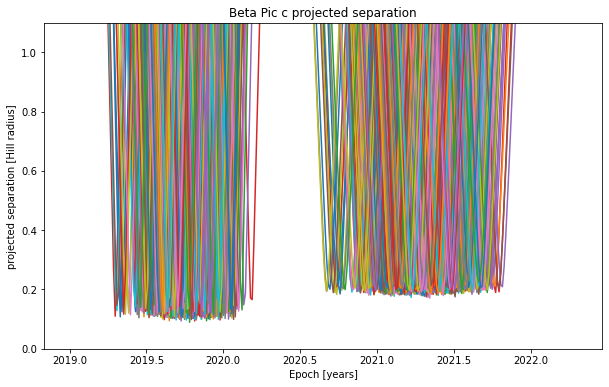

In [3]:
plt.figure(figsize=(10,6))

ep2 = np.linspace(2019,2019.+P.value, 301) * u.year

mask = (ep2 > 2020.5*u.year) * (ep2 < 2022.0*u.year)

Perr = 0.02 * u.yr
Tperierr = 0.11 * u.yr
werr = 8. * u.deg
anodeerr = 0.02 * u.deg
ierr = 0.01 * u.deg
eerr = 0.06
aerr = 0.02 * u.au
def g(sig):
    return (np.random.normal(0.0, sig.value, 1)*sig.unit)

epoc = []
bmin = []
for n in range(1000):

    X, Y, Xs, Ys, Zs, Xv, Yv, Zv = kep3d(ep2, P+g(Perr), Tperi+g(Tperierr), a+g(aerr), e+np.random.normal(0.0,eerr,1), np.squeeze(i+g(ierr)), np.squeeze(w+g(werr)), np.squeeze(anode+g(anodeerr)))
#    X, Y, Xs, Ys, Zs, Xv, Yv, Zv = kep3d(ep2, P+g(Perr), Tperi+g(Tperierr), np.squeeze(a+g(aerr)), e+np.random.normal(0.0,eerr,1), np.squeeze(i+g(ierr)), np.squeeze(w+g(werr)), np.squeeze(anode+g(anodeerr)))

    proj_sep = np.sqrt(Xs*Xs+Ys*Ys)
    
    seprhill = proj_sep/rhill_c
    plt.plot(ep2, seprhill)
    # temporarily set everything outside range
    
    aa = np.argmin(seprhill[mask])

    bmin = np.append(bmin, (seprhill[mask])[aa].value)
    epoc = np.append(epoc, (ep2[mask])[aa].value)


plt.ylim(0,1.1)
plt.ylabel('projected separation [Hill radius]')
plt.xlabel('Epoch [years]')
plt.title('Beta Pic c projected separation');

$2021.27 \pm 0.19\ years$
Start at 2021.09 years and end at 2021.46 years


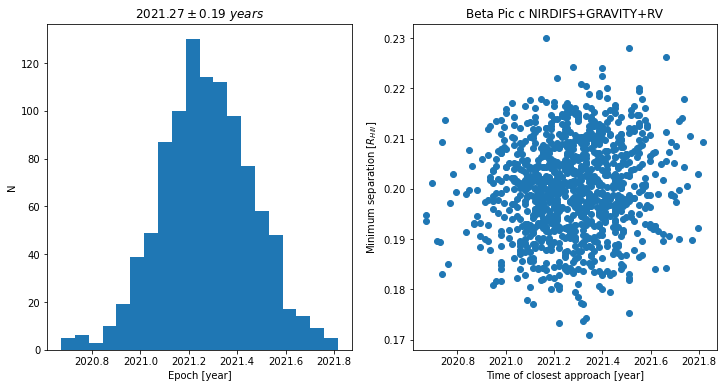

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))


ax1.hist(epoc,20)
ax1.set_xlabel('Epoch [year]')
ax1.set_ylabel('N')
epmean = np.mean(epoc)
epstd = np.std(epoc)
estr1 = r'${:.2f} \pm {:.2f}\ years$'.format(epmean, epstd)
estr2 = 'Start at {:.2f} years and end at {:.2f} years'.format(epmean-epstd, epmean+epstd)

print(estr1)
print(estr2)
ax1.set_title(estr1)
ax2.scatter(epoc,bmin)
ax2.set_xlabel('Time of closest approach [year]')
ax2.set_ylabel('Minimum separation [$R_{Hill}$]')
ax2.set_title('Beta Pic c NIRDIFS+GRAVITY+RV');
plt.savefig('beta_pic_c_hill_sphere.pdf')